<a href="https://colab.research.google.com/github/JJungEEun/lotte_project/blob/jarae/%EC%83%81%ED%92%88%EB%B0%8F%EA%B3%A0%EA%B0%9D_%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#상품 군집분석을 위한 전처리

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

In [6]:
data2=pd.read_csv('/content/drive/MyDrive/lotte/LPOINT_BIG_COMP_02_PDDE.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)




---
#전처리, 변수 생성


data2(거래데이터)에 data4(상품명 데이터)를 병합합니다

In [7]:
data2.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1


In [8]:
#모든 행이 불러와졌는지 확인
len(data2)

4381743

In [9]:
data4=pd.read_csv('/content/drive/MyDrive/lotte/LPOINT_BIG_COMP_04_PD_CLAC.csv')

In [10]:
new_df=pd.read_csv('/content/drive/MyDrive/lotte/new_df.csv')

상품명 확인을 위해, pd_c를 기준으로 코드화된 상품명을 병합합니다

In [11]:
data2=pd.merge(data2,new_df,on='pd_c',how='left')

In [12]:
del data2['Unnamed: 0']

In [13]:
data2.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm,l_pd,m_pd
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,남성티셔츠,남성의류,남성의류상의,L0013,M0058
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,기타주방일회용품,주방잡화,주방일회용품,L0048,M0298
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,L0013,M0058
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,L0013,M0058
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,L0013,M0058




---



구매 횟수가 너무 많은 M057015266, M919374790의 구매 이력을 제거합니다

In [14]:
data2.cust.value_counts()[:5]

M057015266    12448
M919374790    10049
M287960590     2564
M763326819     2524
M124357021     2143
Name: cust, dtype: int64

In [129]:
df=data2[data2.cust!='M057015266']

In [130]:
df=df[df.cust!='M919374790']

In [17]:
len(df)

4359246



---



상품 중분류 분석을 위해, 해당 중분류 상품의 고객 특성을 변수로 사용합니다.

지역, 성별, 연령, 로열성 등 변수를 가져오기 위해, 한 고객의 정보를 한 행으로 하는 데이터 프레임 생성합니다.

In [18]:
cust=df.cust.unique()
cust=pd.DataFrame(cust,columns=['cust'])

In [19]:
cust[:3]

,cust
0,M430112881
1,M646853852
2,M669384418


In [20]:
from collections import defaultdict
c_info=defaultdict()
for c in cust.cust:
  c_info[c]=[0,0]

In [21]:
#최대 30분 소요됩니다

for i in range(len(df)):
  c_info[df.iloc[i].cust][0]+=df.iloc[i].buy_am
  c_info[df.iloc[i].cust][1]+=1

중분류마다 얼마나 높은 가격으로 거래되고, 얼마나 자주 거래되는지 경향성을 변수화하기 위해 고객별 평균 거래금액, 평균 거래횟수를 구합니다.

In [22]:
m_cost=[] #고객의 평균 거래 금액
m_buys=[] #고객의 평균 거래 횟수
for c in cust.cust:
  m_buys.append(c_info[c][1])
  m_cost.append(round(c_info[c][0]/c_info[c][1],2))

In [23]:
cust['m_cost']=m_cost
cust['m_buys']=m_buys

In [24]:
cust.head()

,cust,m_cost,m_buys
0,M430112881,7175.78,415
1,M646853852,25964.06,353
2,M669384418,13042.08,96
3,M886923095,23809.82,110
4,M707991383,88479.37,366


In [25]:
#구매 횟수 관련해, 상위 25%인 214회 이상 구매자를 구매 횟수가 많은 것으로 판단합니다.
df.cust.value_counts().describe()

count    26915.00000
mean       161.96344
std        206.14118
min          1.00000
25%         30.00000
50%         88.00000
75%        214.00000
max       2564.00000
Name: cust, dtype: float64

In [26]:
#구매 금액은 75%가 만원 이하지만, 저렴한 물품 거래가 빈번한 것이 원인이므로 평균값인 23527.7원 이상을 고가로 판단합니다.
df.buy_am.describe()

count    4.359246e+06
mean     2.331587e+04
std      2.303971e+05
min      1.000000e+00
25%      2.000000e+03
50%      4.000000e+03
75%      9.400000e+03
max      6.400000e+07
Name: buy_am, dtype: float64

In [27]:
def royal_cost(x):
  if x>=23257.7:
    return 1
  else:
    return 0

def royal_buys(x):
  if x>=214:
    return 1
  else:
    return 0

In [28]:
cust['royal_cost']=cust.m_cost.apply(royal_cost)
cust['royal_buys']=cust.m_buys.apply(royal_buys)

In [29]:
#royal_cost는 거래 금액, royal_buys는 거래 횟수를 기준으로 로열 고객을 1. 아닌 고객을 0으로 지정한 변수입니다.
cust.head()

,cust,m_cost,m_buys,royal_cost,royal_buys
0,M430112881,7175.78,415,0,1
1,M646853852,25964.06,353,1,1
2,M669384418,13042.08,96,0,0
3,M886923095,23809.82,110,1,0
4,M707991383,88479.37,366,1,1




---



In [30]:
cust

,cust,m_cost,m_buys,royal_cost,royal_buys
0,M430112881,7175.78,415,0,1
1,M646853852,25964.06,353,1,1
2,M669384418,13042.08,96,0,0
3,M886923095,23809.82,110,1,0
4,M707991383,88479.37,366,1,1
...,...,...,...,...,...
26910,M423644302,43600.00,1,1,0
26911,M316481461,218000.00,1,1,0
26912,M765148247,39000.00,1,1,0
26913,M498069014,100000.00,5,1,0


고객의 성별, 연령, 지역 정보를 불러옵니다.

In [31]:
data1=pd.read_csv('/content/drive/MyDrive/lotte/LPOINT_BIG_COMP_01_DEMO.csv')

In [32]:
cust=pd.merge(cust,data1,on='cust',how='left')

In [33]:
cust

,cust,m_cost,m_buys,royal_cost,royal_buys,ma_fem_dv,ages,zon_hlv
0,M430112881,7175.78,415,0,1,여성,50대,Z17
1,M646853852,25964.06,353,1,1,여성,40대,Z13
2,M669384418,13042.08,96,0,0,여성,50대,Z17
3,M886923095,23809.82,110,1,0,여성,40대,Z17
4,M707991383,88479.37,366,1,1,여성,50대,Z16
...,...,...,...,...,...,...,...,...
26910,M423644302,43600.00,1,1,0,여성,20대,Z02
26911,M316481461,218000.00,1,1,0,여성,30대,Z10
26912,M765148247,39000.00,1,1,0,남성,40대,Z04
26913,M498069014,100000.00,5,1,0,여성,40대,Z14


In [34]:
#성별 인코딩: 여1, 남0을 사용합니다
cust['ma_fem_dv']=cust.ma_fem_dv.apply(lambda x: 1 if x=='여성' else 0)

In [35]:
#연령: 연령대의 대표값으로 나타내기 위해, 연령대+ 5를 사용합니다
cust['ages']=cust.ages.apply(lambda x: int(x[:-1])+5)

In [36]:
cust

,cust,m_cost,m_buys,royal_cost,royal_buys,ma_fem_dv,ages,zon_hlv
0,M430112881,7175.78,415,0,1,1,55,Z17
1,M646853852,25964.06,353,1,1,1,45,Z13
2,M669384418,13042.08,96,0,0,1,55,Z17
3,M886923095,23809.82,110,1,0,1,45,Z17
4,M707991383,88479.37,366,1,1,1,55,Z16
...,...,...,...,...,...,...,...,...
26910,M423644302,43600.00,1,1,0,1,25,Z02
26911,M316481461,218000.00,1,1,0,1,35,Z10
26912,M765148247,39000.00,1,1,0,0,45,Z04
26913,M498069014,100000.00,5,1,0,1,45,Z14


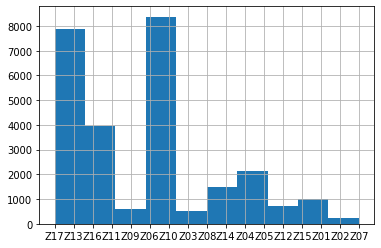

In [37]:
#시각화 결과, Z17과 Z10이 인구가 다수 분포하는 수도권일 것으로 예상되어 해당 지역 거주민을 1, 이외 지역 거주민을 0으로 인코딩 합니다
cust.zon_hlv.hist()

In [38]:
cust['zon_hlv']=cust.zon_hlv.apply(lambda x: 1 if x=='Z17' or x=='Z10' else 0)

In [39]:
cust

,cust,m_cost,m_buys,royal_cost,royal_buys,ma_fem_dv,ages,zon_hlv
0,M430112881,7175.78,415,0,1,1,55,1
1,M646853852,25964.06,353,1,1,1,45,0
2,M669384418,13042.08,96,0,0,1,55,1
3,M886923095,23809.82,110,1,0,1,45,1
4,M707991383,88479.37,366,1,1,1,55,0
...,...,...,...,...,...,...,...,...
26910,M423644302,43600.00,1,1,0,1,25,0
26911,M316481461,218000.00,1,1,0,1,35,1
26912,M765148247,39000.00,1,1,0,0,45,0
26913,M498069014,100000.00,5,1,0,1,45,0




---
고객 데이터 전처리가 완료됐습니다



#구매 데이터 전처리

각 거래 데이터(행) 별로, 분류별 상대적인 인기의 척도로서

거래물품이 속한 중분류의 상대도수, 대분류의 상대도수, 대분류 내 중분류 상대도수 변수를 추가합니다.

In [40]:
dl=df.l_pd.value_counts()
lsum=sum(df.l_pd.value_counts())

In [41]:
dl['L0008'] #dl은 각 대분류 상품명의 등장 횟수입니다

435495

In [42]:
l_p=[]
for p in df.l_pd:
  l_p.append(round(dl[p]/lsum,3))
l_p[:3]

[0.016, 0.014, 0.016]

In [132]:
df['l_p']=l_p

중분류 상대도수

In [44]:
dm=df.m_pd.value_counts()
msum=sum(df.m_pd.value_counts())

In [45]:
m_p=[]
for p in df.m_pd:
  m_p.append(round(dm[p]/msum,3))

In [133]:
df['m_p']=m_p

대분류 내 중분류 상대도수 

In [47]:
l_m_p=[]
for x,y in zip(df.l_pd,df.m_pd):
  l_m_p.append(round(dm[y]/dl[x],3))

In [48]:
#대분류, 중분류, 대분류내 중분류 상대도수 
for x,y,z in zip(l_p[:10],m_p[:10],l_m_p[:10]):
  print(x,y,z)

0.016 0.005 0.305
0.014 0.002 0.147
0.016 0.005 0.305
0.016 0.005 0.305
0.016 0.005 0.305
0.038 0.029 0.766
0.009 0.001 0.122
0.001 0.0 0.201
0.017 0.005 0.264
0.017 0.007 0.424


In [131]:
df['l_m_p']=l_m_p

In [134]:
df

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm,l_pd,m_pd,m_label,my_cl,l_m_p,l_p,m_p
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,남성티셔츠,남성의류,남성의류상의,L0013,M0058,2,2,0.305,0.016,0.005
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,기타주방일회용품,주방잡화,주방일회용품,L0048,M0298,3,1,0.147,0.014,0.002
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,L0013,M0058,2,2,0.305,0.016,0.005
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,L0013,M0058,2,2,0.305,0.016,0.005
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,L0013,M0058,2,2,0.305,0.016,0.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4359241,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,L0022,M0103,9,2,0.949,0.003,0.003
4359242,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,L0022,M0103,9,2,0.949,0.003,0.003
4359243,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,L0022,M0103,9,2,0.949,0.003,0.003
4359244,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,L0022,M0103,9,2,0.949,0.003,0.003




---



제휴사

In [51]:
df.cop_c.value_counts()

A02    2374960
A03     905691
A01     700350
A04     293916
A06      76159
A05       8170
Name: cop_c, dtype: int64

In [52]:
#제휴사에 따라 상품 성향이 다릅니다.
df.groupby(['cop_c'])['clac_hlv_nm'].agg(pd.Series.mode)

cop_c
A01    테넌트/음식점
A02         채소
A03         채소
A04         음료
A05        컴퓨터
A06        상품권
Name: clac_hlv_nm, dtype: object

In [53]:
df[df['cop_c']=='A01'].clac_hlv_nm.value_counts()[:5]
#A1은 백화점 또는 쇼핑몰로 추측되며

테넌트/음식점     118284
여성의류         61681
남성의류         61618
스포츠패션        55184
패션잡화         41788
과자           36996
기타(비상품)      34252
조리식품         32010
화장품/뷰티케어     24784
대용식          19080
Name: clac_hlv_nm, dtype: int64

In [54]:
df[df['cop_c']=='A02'].clac_hlv_nm.value_counts()[:5]
#A2는 마트 또는 식료품점,

채소      278231
과자      252567
대용식     190880
유제품     177938
냉장식품    167319
과일      154620
축산물     119312
음료      115526
조미료      96808
주류       87601
Name: clac_hlv_nm, dtype: int64

In [55]:
df[df['cop_c']=='A03'].clac_hlv_nm.value_counts()[:5]
#A3 역시 마트 또는 식료품점,

채소      131233
과자      102733
대용식      77184
유제품      76025
냉장식품     61153
과일       56385
축산물      55617
음료       54604
주류       52094
냉동식품     43370
Name: clac_hlv_nm, dtype: int64

In [56]:
df[df['cop_c']=='A04'].clac_hlv_nm.value_counts()[:5]
#A4는 편의점으로 추측

음료         57335
과자         41320
담배         35147
조리식품       24627
유제품        21232
주류         21167
대용식        20585
냉장식품       19934
냉동식품       14040
기타(비상품)    10179
Name: clac_hlv_nm, dtype: int64

In [57]:
df[df['cop_c']=='A05'].clac_hlv_nm.value_counts()[:10]
#가전제품 매장으로 예상

컴퓨터        2380
생활/주방가전    1895
모바일        1407
계절가전        748
냉장/세탁가전     398
완구          332
영상/음향가전     322
식기/조리기구     100
공구/안전용품      87
건강용품         86
Name: clac_hlv_nm, dtype: int64

In [58]:
df[df['cop_c']=='A06'].clac_hlv_nm.value_counts()[:10]
#아울렛 또는 백화점 같습니다

상품권          12088
여성의류          5053
패션잡화          4611
화장품/뷰티케어      3391
유아동의류         3030
남성의류          3002
속옷/양말/홈웨어     2838
스포츠패션         2777
음료            2612
대용식           2335
Name: clac_hlv_nm, dtype: int64

A01, A06이 유사하며 A02, A03이 유사합니다.

변수의 설명력을 유지하기 위해 정수 라벨링을 사용하지 않습니다

네가지 그룹에 대해 원 핫 인코딩을 적용합니다.

In [59]:
def A1(x): #쇼핑몰, 백화점
  if x=='A01' or x=='A06':
    return 1
  else:
    return 0

def A2(x): #식료품점, 대형마트
  if x=='A02' or x=='A03':
    return 1
  else:
    return 0

def A3(x): #편의점
  if x=='A04':
    return 1
  else:
    return 0

def A4(x): #가전제품 매장
  if x=='A05':
    return 1
  else:
    return 0

In [149]:
df['a1']=df.cop_c.apply(A1)
df['a2']=df.cop_c.apply(A2)
df['a3']=df.cop_c.apply(A3)
df['a4']=df.cop_c.apply(A4)

In [136]:
df

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,...,m_pd,m_label,my_cl,l_m_p,l_p,m_p,A1,A2,A3,A4
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,...,M0058,2,2,0.305,0.016,0.005,1,0,0,0
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,...,M0298,3,1,0.147,0.014,0.002,1,0,0,0
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,M0058,2,2,0.305,0.016,0.005,1,0,0,0
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,M0058,2,2,0.305,0.016,0.005,1,0,0,0
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,M0058,2,2,0.305,0.016,0.005,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4359241,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,M0103,9,2,0.949,0.003,0.003,1,0,0,0
4359242,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,M0103,9,2,0.949,0.003,0.003,1,0,0,0
4359243,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,M0103,9,2,0.949,0.003,0.003,1,0,0,0
4359244,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,M0103,9,2,0.949,0.003,0.003,1,0,0,0


군집분석을 위한 메인 데이터가 준비되었습니다.

분류용 데이터를 만들기 위해 다시 가공이 필요합니다

In [137]:
df=pd.merge(df,cust, on='cust',how='left')

In [138]:
df

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,...,A2,A3,A4,m_cost,m_buys,royal_cost,royal_buys,ma_fem_dv,ages,zon_hlv
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,...,0,0,0,7175.78,415,0,1,1,55,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,...,0,0,0,25964.06,353,1,1,1,45,0
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,0,0,0,7175.78,415,0,1,1,55,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,0,0,0,7175.78,415,0,1,1,55,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,0,0,0,7175.78,415,0,1,1,55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4359241,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,0,0,0,25081.43,260,1,1,0,45,1
4359242,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,0,0,0,25081.43,260,1,1,0,45,1
4359243,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,0,0,0,25081.43,260,1,1,0,45,1
4359244,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,0,0,0,25081.43,260,1,1,0,45,1


In [64]:
df.columns

Index(['cust', 'rct_no', 'chnl_dv', 'cop_c', 'br_c', 'pd_c', 'de_dt', 'de_hr',
       'buy_am', 'buy_ct', 'pd_nm', 'clac_hlv_nm', 'clac_mcls_nm', 'l_pd',
       'm_pd', 'l_p', 'm_p', 'l_m_p', 'A1', 'A2', 'A3', 'A4', 'm_cost',
       'm_buys', 'royal_cost', 'royal_buys', 'ma_fem_dv', 'ages', 'zon_hlv'],
      dtype='object')

In [65]:
data=pd.DataFrame(df.clac_mcls_nm.unique(), columns=['clac_mcls_nm'])

In [66]:
#관측 30회 미만인 중분류는 군집분석에 포함을 안할 수도 있습니다만, 일단 포함하겠습니다
df.m_pd.value_counts()[-20:].keys()

Index(['M0074', 'M0097', 'M0045', 'M0098', 'M0139', 'M0130', 'M0113', 'M0061',
       'M0187', 'M0046', 'M0271', 'M0328', 'M0164', 'M0225', 'M0219', 'M0231',
       'M0018', 'M0148', 'M0188', 'M0122'],
      dtype='object')

In [67]:
df.columns

Index(['cust', 'rct_no', 'chnl_dv', 'cop_c', 'br_c', 'pd_c', 'de_dt', 'de_hr',
       'buy_am', 'buy_ct', 'pd_nm', 'clac_hlv_nm', 'clac_mcls_nm', 'l_pd',
       'm_pd', 'l_p', 'm_p', 'l_m_p', 'A1', 'A2', 'A3', 'A4', 'm_cost',
       'm_buys', 'royal_cost', 'royal_buys', 'ma_fem_dv', 'ages', 'zon_hlv'],
      dtype='object')

cost 변수로 중분류 구매 이력이 있는 각 고객의 "평균 거래금액"들의 평균 (고객 로열성)과,

buys 변수로 중분류 구매 이력이 있는 각 고객의 평균 거래횟수를 추가합니다.

In [68]:
buys=[]
cost=[]

for p in data.clac_mcls_nm:
  buys.append(df[df['clac_mcls_nm']==p].m_buys.mean().round(3))
  cost.append(df[df['clac_mcls_nm']==p].m_cost.mean().round(3))

In [69]:
data['buys']=buys
data['cost']=cost

중분류 거래 내역이 있는 고객의 성별, 연령도 중분류별로 평균을 냅니다.

성별의 경우, 여성의 많이 이용할수록 1에 가까워집니다.

In [70]:
ma_fem_dv=[]
ages=[]

for p in data.clac_mcls_nm:
  ma_fem_dv.append(df[df['clac_mcls_nm']==p].ma_fem_dv.mean().round(3))
  ages.append(df[df['clac_mcls_nm']==p].ages.mean().round(3))

In [71]:
data['ma_fem_dv']=ma_fem_dv
data['ages']=ages

각 중분류에 대해 전체거래 중 해당 중분류 거래 횟수, (중분류의 상대적인 인기도)

중분류가 속한 대분류 거래횟수, (중분류가 속한 대분류의 상대적인 인기도) 

중분류가 속한 대분류 내 중분류 거래 횟수의 상대도수를 구합니다. (같은 대분류 내 중분류와 비교한 인기도)

In [72]:
p_l=[]
p_m=[]
p_lm=[]

#중분류의 경우 left join해도 되지만, 아래와 같은 코드를 사용해도 결과가 동일하므로
#코드를 통일합니다

for p in data.clac_mcls_nm:
  p_l.append(df[df['clac_mcls_nm']==p].l_p.mean().round(3))
  p_m.append(df[df['clac_mcls_nm']==p].m_p.mean().round(3))
  p_lm.append(df[df['clac_mcls_nm']==p].l_m_p.mean().round(3))

In [73]:
data['p_l']=p_l
data['p_m']=p_l
data['p_lm']=p_lm

royal1 변수는 이전에 설정한 두 가지 고객 로열성 조건에 따라 1,0으로 구분한 royal_buys, royal_cost 두 변수를, 

특정 중분류의 구매 이력에 따라 평균 냅니다. 이는 로열 고객에 대한 각 중분류 물품의 인기도를 나타냅니다.



In [74]:
data.head()

,clac_mcls_nm,buys,cost,ma_fem_dv,ages,p_l,p_m,p_lm
0,남성의류상의,249.600,60803.834,0.713,45.128,0.016,0.016,0.305
1,주방일회용품,429.015,17389.587,0.682,43.835,0.014,0.014,0.147
2,식당,312.841,43548.075,0.739,44.129,0.038,0.038,0.766
3,남성양말류,378.080,28168.739,0.721,47.689,0.009,0.009,0.122
4,기타구기/필드스포츠,297.848,28868.166,0.730,44.445,0.001,0.001,0.201


In [75]:
royal1=[]
royal2=[]

for p in data.clac_mcls_nm:
  royal1.append(df[df['clac_mcls_nm']==p].royal_buys.mean().round(3))
  royal2.append(df[df['clac_mcls_nm']==p].royal_cost.mean().round(3))

In [76]:
data['royal1']=royal1
data['royal2']=royal2

In [77]:
data.head()

,clac_mcls_nm,buys,cost,ma_fem_dv,ages,p_l,p_m,p_lm,royal1,royal2
0,남성의류상의,249.600,60803.834,0.713,45.128,0.016,0.016,0.305,0.418,0.576
1,주방일회용품,429.015,17389.587,0.682,43.835,0.014,0.014,0.147,0.682,0.161
2,식당,312.841,43548.075,0.739,44.129,0.038,0.038,0.766,0.533,0.404
3,남성양말류,378.080,28168.739,0.721,47.689,0.009,0.009,0.122,0.615,0.239
4,기타구기/필드스포츠,297.848,28868.166,0.730,44.445,0.001,0.001,0.201,0.487,0.326


제휴사 변수인 a1~a4 역시 중분류 물품 별로 평균을 냅니다.

각 중분류가 특정 제휴사에서 자주 거래될수록 1에 가까운 값이 됩니다.

In [78]:
a1=[] #패션, 뷰티 등
a2=[] #식료품 등
a3=[] #담배, 주류 등
a4=[] #전자, 가전 등

for p in data.clac_mcls_nm:
  a1.append(df[df['clac_mcls_nm']==p].A1.mean().round(3))
  a2.append(df[df['clac_mcls_nm']==p].A2.mean().round(3))
  a3.append(df[df['clac_mcls_nm']==p].A3.mean().round(3))
  a4.append(df[df['clac_mcls_nm']==p].A4.mean().round(3))

In [79]:
data['a1']=a1
data['a2']=a2
data['a3']=a3
data['a4']=a4



---



In [80]:
data.head()

,clac_mcls_nm,buys,cost,ma_fem_dv,ages,p_l,p_m,p_lm,royal1,royal2,a1,a2,a3,a4
0,남성의류상의,249.600,60803.834,0.713,45.128,0.016,0.016,0.305,0.418,0.576,0.886,0.114,0.000,0.0
1,주방일회용품,429.015,17389.587,0.682,43.835,0.014,0.014,0.147,0.682,0.161,0.097,0.827,0.075,0.0
2,식당,312.841,43548.075,0.739,44.129,0.038,0.038,0.766,0.533,0.404,0.683,0.317,0.000,0.0
3,남성양말류,378.080,28168.739,0.721,47.689,0.009,0.009,0.122,0.615,0.239,0.207,0.779,0.014,0.0
4,기타구기/필드스포츠,297.848,28868.166,0.730,44.445,0.001,0.001,0.201,0.487,0.326,0.408,0.592,0.000,0.0


상품 클러스터링을 위한 전처리가 완료되었습니다.



---



#중분류 클러스터링을 위한 주성분 분석

여러 모델 실험 결과, MinMaxScaler의 결과가 StandardScaler보다 덜 랜덤한 분포를 보이기 때문에 MinMaxScaler로 스케일 조정을 합니다.

In [81]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

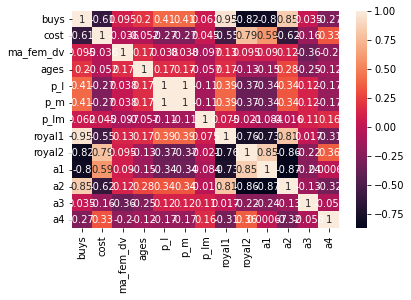

In [82]:
correl=data.corr()
sns.heatmap(correl,annot=True)

중간중간 상관계수가 높은 변수들이 보이므로, 주성분 분석을 통해 차원을 축소합니다.

In [83]:
data.columns

Index(['clac_mcls_nm', 'buys', 'cost', 'ma_fem_dv', 'ages', 'p_l', 'p_m',
       'p_lm', 'royal1', 'royal2', 'a1', 'a2', 'a3', 'a4'],
      dtype='object')

In [84]:
features = ['royal1', 'royal2', 'buys','cost', 'ma_fem_dv', 'ages', 'p_l', 'p_m', 'p_lm', 'a1', 'a2', 'a3', 'a4']
# 사용데이터와 분류 대상을 분리
x = data.loc[:, features].values
y = data.loc[:,['clac_mcls_nm']].values

#양적 변수 스케일 조정
x = MinMaxScaler().fit_transform(x)

주성분 분석에 사용할 변수들을 지정하고, 스케일을 조정합니다.

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pc = pca.fit_transform(x)
pcdf = pd.DataFrame(data = pc,columns = ['pc'+str(i) for i in range(5)])

In [86]:
print("pc 총분산: {1}, 분산: {0}".format(pca.explained_variance_ratio_,round(sum(pca.explained_variance_ratio_),3)))

pc 총분산: 0.932, 분산: [0.58706152 0.1687405  0.08003874 0.05545434 0.04068126]


주성분 요소 5가지를 사용해, 93%의 분산을 설명합니다. 

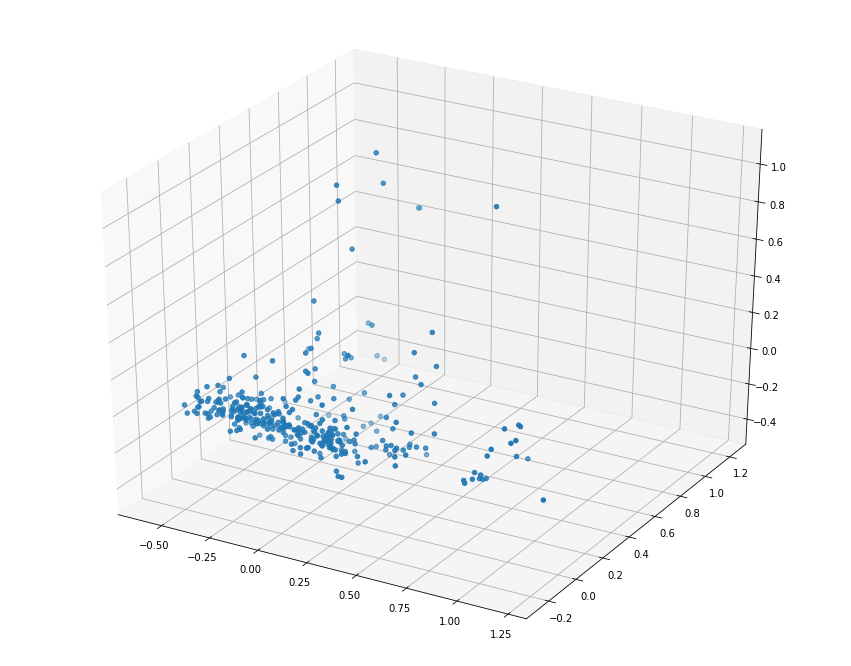

In [87]:
#첫 3요소로 차원을 축소한 data 정보의 3차원 시각화입니다
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pcdf.pc1, pcdf.pc2, pcdf.pc3)
fig.set_size_inches(15,12)
plt.show()



---



#클러스터링


In [88]:
from sklearn.cluster import KMeans

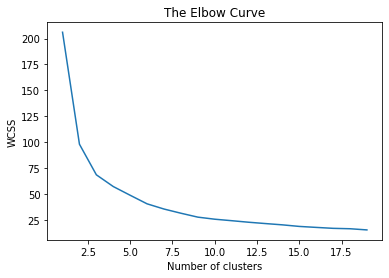

In [89]:
wcss = []
for i in range(1,20):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(pcdf)
 wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

위 그림을 볼 때 최소 5개 이상의 군집을 사용해야 할 것으로 보입니다.

n=5, 10, 15, 20, 25로 실험 결과, n=10으로 한 k-means 클러스터링의 결과가 가장 적절합니다.


In [90]:
kmeans = KMeans(n_clusters=10,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans.fit(pcdf)

KMeans(n_clusters=10, random_state=0)

In [91]:
#분류 결과인 라벨을 data에 변수로 추가합니다.
data['m_label']=kmeans.labels_

In [92]:
#각 군집으로 분류된 개수입니다.
data.m_label.value_counts()

2    76
3    68
7    46
1    39
8    37
6    26
4    18
0    18
9    14
5     7
Name: m_label, dtype: int64

#상품 중분류 클러스터링 결과

In [93]:
for i in range(10):
  print(data[data['m_label']==i].clac_mcls_nm)

91           냉방가전
107            TV
108           청소기
109           세탁기
119    공기청정/가습/제습
123       컴퓨터주변기기
130       컴퓨터/노트북
131         이미용가전
132          생활가전
144        냉장/냉동고
152          주방가전
185         모바일기기
262          난방가전
278           오디오
316      DVD/홈시어터
340           전화기
341           기프트
342            보험
Name: clac_mcls_nm, dtype: object
3           남성양말류
11             장갑
13           조리도구
48              떡
53           교육완구
68            홈웨어
69          여성양말류
79       액세서리편의용품
87           원두커피
116          바디케어
118        핸드/풋케어
120          온장조리
124     일반문구/사무용품
137            원예
146          수예소품
147       여아의류아우터
158    카페트/러그/매트류
171    실외놀이/스포츠완구
179          미용소품
183          헤어케어
212          정리용품
219       밀폐/보관용기
233      사무용지/서식지
237        수산선물세트
241       소형디지털가전
243         교육보조재
251        헤어액세서리
254      건해산물선물세트
265         스키/보드
270           웨이트
288            축구
290    자동차음향/가전기기
293          건강진액
294       안마/찜질용품
296    여아의류특수목적의류
297      전자/

In [139]:
data.groupby(["m_label"]).mean()

,buys,cost,ma_fem_dv,ages,p_l,p_m,p_lm,royal1,royal2,a1,a2,a3,a4
m_label,,,,,,,,,,,,,
0,232.095667,145765.533611,0.635222,43.934000,0.001056,0.001056,0.329111,0.376000,0.737944,0.480056,0.003167,0.001056,0.515722
1,380.316923,28528.322051,0.720949,44.973744,0.009051,0.009051,0.110256,0.620821,0.255692,0.245821,0.728077,0.016590,0.009590
2,254.607263,79677.216158,0.722526,44.392013,0.010855,0.010855,0.068118,0.441342,0.624382,0.931211,0.062934,0.000368,0.005474
3,438.347897,17582.978353,0.722294,45.808412,0.010971,0.010971,0.099838,0.701471,0.145426,0.063029,0.926544,0.009868,0.000574
4,453.444778,19182.491167,0.730722,45.973056,0.098500,0.098500,0.111111,0.725833,0.152389,0.101333,0.839722,0.058944,0.000000
5,324.336143,16255.784143,0.484857,40.749000,0.013143,0.013143,0.328143,0.526000,0.147000,0.035286,0.018714,0.945429,0.000429
6,440.161000,18882.251577,0.693615,44.795962,0.011615,0.011615,0.517808,0.711346,0.140538,0.052423,0.893769,0.052577,0.001192
7,442.150348,17270.357935,0.699804,45.517674,0.054739,0.054739,0.140152,0.708630,0.142370,0.086478,0.834630,0.078913,0.000000
8,320.312000,47381.466108,0.741622,44.707784,0.008486,0.008486,0.103081,0.540027,0.414324,0.546135,0.435162,0.013622,0.005027




---



#중분류 클러스터링 해석

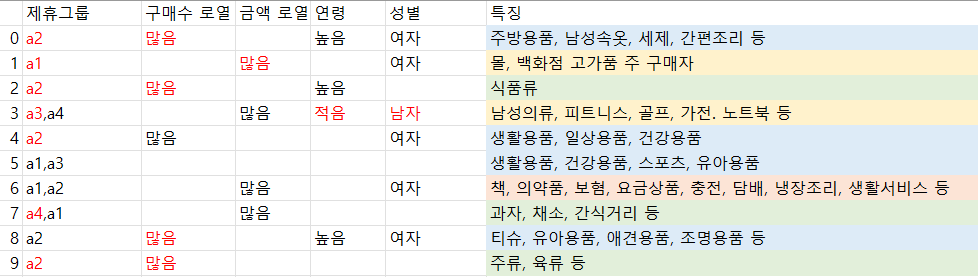

위 중분류 그룹별 요약 정보와 그룹내 속한 중분류 명을 바탕으로, 10개의 중분류 군집이 크게 0(생활품 등 용품류), 1(패션,뷰티 등 고가류), 2(식품류), 3(기타)로 묶일 수 있음을 확인합니다. 이는 고객 군집분석 때 변수로 추가할 것입니다.



---



#고객 클러스터링

위에서 진행한 상품 클러스터링에 이어서, 상품중분류 군집분석 결과를 이용해 고객의 유형을 나눠볼 것입니다.

In [95]:
data

,clac_mcls_nm,buys,cost,ma_fem_dv,ages,p_l,p_m,p_lm,royal1,royal2,a1,a2,a3,a4,m_label
0,남성의류상의,249.600,60803.834,0.713,45.128,0.016,0.016,0.305,0.418,0.576,0.886,0.114,0.000,0.0,2
1,주방일회용품,429.015,17389.587,0.682,43.835,0.014,0.014,0.147,0.682,0.161,0.097,0.827,0.075,0.0,3
2,식당,312.841,43548.075,0.739,44.129,0.038,0.038,0.766,0.533,0.404,0.683,0.317,0.000,0.0,9
3,남성양말류,378.080,28168.739,0.721,47.689,0.009,0.009,0.122,0.615,0.239,0.207,0.779,0.014,0.0,1
4,기타구기/필드스포츠,297.848,28868.166,0.730,44.445,0.001,0.001,0.201,0.487,0.326,0.408,0.592,0.000,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,소모품,129.500,35777.690,0.500,45.000,0.010,0.010,0.000,0.000,0.500,1.000,0.000,0.000,0.0,2
345,격투기,363.667,112465.367,0.333,41.667,0.001,0.001,0.001,0.667,0.333,1.000,0.000,0.000,0.0,2
346,오토바이,243.500,22953.957,0.000,50.000,0.002,0.002,0.001,0.333,0.333,1.000,0.000,0.000,0.0,2
347,임산부케어용품,214.571,20054.963,0.714,40.714,0.002,0.002,0.001,0.429,0.429,1.000,0.000,0.000,0.0,2


In [96]:
#이 중 대부분의 변수를 그대로 사용합니다.
cust

,cust,m_cost,m_buys,royal_cost,royal_buys,ma_fem_dv,ages,zon_hlv
0,M430112881,7175.78,415,0,1,1,55,1
1,M646853852,25964.06,353,1,1,1,45,0
2,M669384418,13042.08,96,0,0,1,55,1
3,M886923095,23809.82,110,1,0,1,45,1
4,M707991383,88479.37,366,1,1,1,55,0
...,...,...,...,...,...,...,...,...
26910,M423644302,43600.00,1,1,0,1,25,0
26911,M316481461,218000.00,1,1,0,1,35,1
26912,M765148247,39000.00,1,1,0,0,45,0
26913,M498069014,100000.00,5,1,0,1,45,0


고객 군집분석도 구매가 매우 많은 두 고객을 이상치로 판단하여 배제하는 등 상품 클러스터링과 유사한 조건에서 시작하므로, data2(거래 내역) 데이터프레임의 확장인 df 변수를 계속 사용합니다.

In [99]:
cust

,cust,m_cost,m_buys,royal_cost,royal_buys,ma_fem_dv,ages,zon_hlv
0,M430112881,7175.78,415,0,1,1,55,1
1,M646853852,25964.06,353,1,1,1,45,0
2,M669384418,13042.08,96,0,0,1,55,1
3,M886923095,23809.82,110,1,0,1,45,1
4,M707991383,88479.37,366,1,1,1,55,0
...,...,...,...,...,...,...,...,...
26910,M423644302,43600.00,1,1,0,1,25,0
26911,M316481461,218000.00,1,1,0,1,35,1
26912,M765148247,39000.00,1,1,0,0,45,0
26913,M498069014,100000.00,5,1,0,1,45,0


In [100]:
#상품 중분류 클러스터링을 0(용품류), 1(고가류), 2(식품류), 3(기타)로 다시 나눈 열도 추가합니다

def my_cl(x):
  if x in [0,4,5,8]:
    return 0
  elif x in [1,3]:
    return 1
  elif x in [2,7,9]:
    return 2
  else:
    return 3

In [101]:
#고객 데이터에 원핫 인코딩으로 중분류별 구매 관련 변수를 추가하기 전, data2(거래 내역)에 중분류 군집 라벨을 추가합니다 
df=pd.merge(df, data[['clac_mcls_nm','m_label']],on='clac_mcls_nm',how='left')

In [140]:
df['my_cl']=df.m_label.apply(my_cl)

In [141]:
df

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,...,A2,A3,A4,m_cost,m_buys,royal_cost,royal_buys,ma_fem_dv,ages,zon_hlv
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,...,0,0,0,7175.78,415,0,1,1,55,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,...,0,0,0,25964.06,353,1,1,1,45,0
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,0,0,0,7175.78,415,0,1,1,55,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,0,0,0,7175.78,415,0,1,1,55,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,0,0,0,7175.78,415,0,1,1,55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4359241,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,0,0,0,25081.43,260,1,1,0,45,1
4359242,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,0,0,0,25081.43,260,1,1,0,45,1
4359243,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,0,0,0,25081.43,260,1,1,0,45,1
4359244,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,0,0,0,25081.43,260,1,1,0,45,1


In [142]:
df.columns

Index(['cust', 'rct_no', 'chnl_dv', 'cop_c', 'br_c', 'pd_c', 'de_dt', 'de_hr',
       'buy_am', 'buy_ct', 'pd_nm', 'clac_hlv_nm', 'clac_mcls_nm', 'l_pd',
       'm_pd', 'm_label', 'my_cl', 'l_m_p', 'l_p', 'm_p', 'A1', 'A2', 'A3',
       'A4', 'm_cost', 'm_buys', 'royal_cost', 'royal_buys', 'ma_fem_dv',
       'ages', 'zon_hlv'],
      dtype='object')

In [143]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

#10개 클러스터링 원핫 인코딩 병합
encoder_df = pd.DataFrame(encoder.fit_transform(df[['m_label']]).toarray())
encoder_df.columns=['c'+str(i) for i in range(10)]
df = df.join(encoder_df)

In [144]:
#4개 주관 클러스터링 원핫 인코딩 병합
encoder_df = pd.DataFrame(encoder.fit_transform(data2[['my_cl']]).toarray())
encoder_df.columns=['m'+str(i) for i in range(4)]
df = df.join(encoder_df)

In [145]:
df.columns

Index(['cust', 'rct_no', 'chnl_dv', 'cop_c', 'br_c', 'pd_c', 'de_dt', 'de_hr',
       'buy_am', 'buy_ct', 'pd_nm', 'clac_hlv_nm', 'clac_mcls_nm', 'l_pd',
       'm_pd', 'm_label', 'my_cl', 'l_m_p', 'l_p', 'm_p', 'A1', 'A2', 'A3',
       'A4', 'm_cost', 'm_buys', 'royal_cost', 'royal_buys', 'ma_fem_dv',
       'ages', 'zon_hlv', 'c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8',
       'c9', 'm0', 'm1', 'm2', 'm3'],
      dtype='object')

In [123]:
cust

,cust,m_cost,m_buys,royal_cost,royal_buys,ma_fem_dv,ages,zon_hlv
0,M430112881,7175.78,415,0,1,1,55,1
1,M646853852,25964.06,353,1,1,1,45,0
2,M669384418,13042.08,96,0,0,1,55,1
3,M886923095,23809.82,110,1,0,1,45,1
4,M707991383,88479.37,366,1,1,1,55,0
...,...,...,...,...,...,...,...,...
26910,M423644302,43600.00,1,1,0,1,25,0
26911,M316481461,218000.00,1,1,0,1,35,1
26912,M765148247,39000.00,1,1,0,0,45,0
26913,M498069014,100000.00,5,1,0,1,45,0


In [146]:
df

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,...,c4,c5,c6,c7,c8,c9,m0,m1,m2,m3
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4359241,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4359242,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4359243,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4359244,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [152]:
cust_=pd.merge(cust, df.groupby(['cust'])['chnl_dv', 'buy_am', 'buy_ct', 'a1','a2','a3','a4','c0','c1','c2','c3','c4','c5','c6','c7','c8','c9','m0','m1','m2','m3'].agg('mean'),on='cust',how='left')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [153]:
cust_.columns

Index(['cust', 'm_cost', 'm_buys', 'royal_cost', 'royal_buys', 'ma_fem_dv',
       'ages', 'zon_hlv', 'chnl_dv', 'buy_am', 'buy_ct', 'a1', 'a2', 'a3',
       'a4', 'c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'm0',
       'm1', 'm2', 'm3'],
      dtype='object')

#고객 데이터 주성분 분석

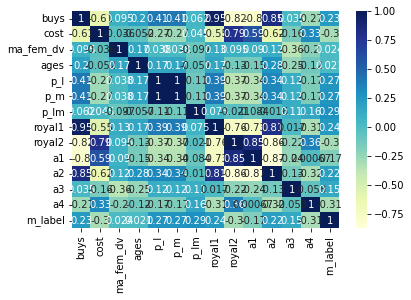

In [154]:
import seaborn as sns

correl=data.corr()
sns.heatmap(correl,annot=True,cmap="YlGnBu")

상관계수가 높은 변수들을 사용하는 문제는 중분류 군집분석과 마찬가지로 차원 축소를 통해 해결합니다

상품 군집분석과 마찬가지로, StandardScaler는 분류 결과 각 군집에 속한 중분류의 수가 극단적으로 분포하므로 MinMaxScaler를 사용합니다

In [121]:
cust_

,cust,m_cost,m_buys,royal_cost,royal_buys,ma_fem_dv,ages,zon_hlv,a1,a2,...,c4,c5,c6,c7,c8,c9,m0,m1,m2,m3
0,M430112881,7175.78,415,0,1,1,55,1,0.098795,0.893976,...,0.219277,0.004819,0.093976,0.484337,0.004819,0.016867,0.228916,0.142169,0.534940,0.093976
1,M646853852,25964.06,353,1,1,1,45,0,0.147309,0.852691,...,0.178470,0.000000,0.101983,0.430595,0.008499,0.048159,0.189802,0.138810,0.569405,0.101983
2,M669384418,13042.08,96,0,0,1,55,1,0.281250,0.718750,...,0.250000,0.000000,0.104167,0.270833,0.000000,0.114583,0.250000,0.083333,0.562500,0.104167
3,M886923095,23809.82,110,1,0,1,45,1,0.509091,0.000000,...,0.100000,0.000000,0.145455,0.427273,0.072727,0.045455,0.172727,0.045455,0.636364,0.145455
4,M707991383,88479.37,366,1,1,1,55,0,0.915301,0.084699,...,0.163934,0.008197,0.027322,0.188525,0.051913,0.161202,0.254098,0.079235,0.639344,0.027322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26910,M423644302,43600.00,1,1,0,1,25,0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
26911,M316481461,218000.00,1,1,0,1,35,1,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
26912,M765148247,39000.00,1,1,0,0,45,0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
26913,M498069014,100000.00,5,1,0,1,45,0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000


In [186]:
#주성분 분석에 포함될, 최종적으로 군집분석에 사용할 변수들입니다.
#m_cost와 buy_am은 변수 특성이 유사하므로 buy_am을 사용합니다.

features = ['m_buys', 'ma_fem_dv', 'ages', 'zon_hlv', 'chnl_dv', 'buy_am',
       'buy_ct', 'a1', 'a2', 'a3', 'a4', 'c0', 'c1', 'c2', 'c3', 'c4',
       'c5', 'c6', 'c7', 'c8', 'c9', 'm0', 'm1', 'm2', 'm3']

x = cust_.loc[:,features].values
y = cust_.loc[:,['cust']].values

#스케일 조정
x=MinMaxScaler().fit_transform(x)

In [156]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=10)
pc2 = pca2.fit_transform(x)
pcdf2 = pd.DataFrame(data = pc2
             , columns = ['pc'+str(i) for i in range(10)])

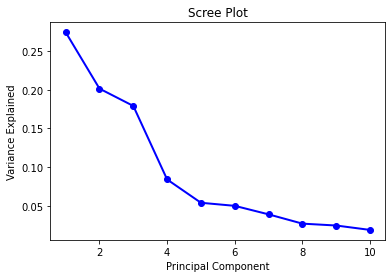

In [157]:
import numpy as np

PC_values = np.arange(pca2.n_components_) + 1
plt.plot(PC_values, pca2.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Screeplot의 꺾임을 바탕으로, 적절히 6개의 주성분을 사용해 약 85%의 분산을 설명합니다

In [187]:
x

array([[0.16152946, 1.        , 0.6       , ..., 0.14216867, 0.53493976,
        0.0939759 ],
       [0.13733906, 1.        , 0.4       , ..., 0.1388102 , 0.5694051 ,
        0.101983  ],
       [0.03706594, 1.        , 0.6       , ..., 0.08333333, 0.5625    ,
        0.10416667],
       ...,
       [0.        , 0.        , 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.00156067, 1.        , 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 1.        , 0.6       , ..., 0.        , 1.        ,
        0.        ]])

In [189]:
pca2 = PCA(n_components=6)
pc2 = pca2.fit_transform(x)
pcdf2 = pd.DataFrame(data = pc2
             , columns = ['pc'+str(i) for i in range(6)])

In [190]:
print("pc2 총분산: {1}, 분산: {0}".format(pca2.explained_variance_ratio_,round(sum(pca2.explained_variance_ratio_),3)))

pc2 총분산: 0.843, 분산: [0.27457168 0.20154921 0.17915082 0.08395122 0.05376585 0.04979049]


In [191]:
kmeans2 = KMeans(n_clusters=10,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans2.fit(pcdf2)

KMeans(n_clusters=10, random_state=0)

In [193]:
cust_['c_label']=kmeans2.labels_



---





---



고객 군집분석 결과 EDA

In [238]:
import matplotlib.pyplot as plt

x_label=list(range(10))
c = ['#FDCC6C','#FDCC6C', '#FDCC6C','#FDB26C','#FDCC6C','#FDBA6C','#FDA06C','#FDCC6C','#FDB26C','#FDA06C']

#0: #FD6C8F
#1,2,4,7: #FDCC6C
#6,9: #FDA06C
#3,8: #FDB26C
#5: #FDBA6C

In [239]:
cust_

,cust,m_cost,m_buys,royal_cost,royal_buys,ma_fem_dv,ages,zon_hlv,chnl_dv,buy_am,...,c5,c6,c7,c8,c9,m0,m1,m2,m3,c_label
0,M430112881,7175.78,415,0,1,1,55,1,1.000000,7175.775904,...,0.004819,0.093976,0.484337,0.004819,0.016867,0.228916,0.142169,0.534940,0.093976,3
1,M646853852,25964.06,353,1,1,1,45,0,1.014164,25964.059490,...,0.000000,0.101983,0.430595,0.008499,0.048159,0.189802,0.138810,0.569405,0.101983,0
2,M669384418,13042.08,96,0,0,1,55,1,1.000000,13042.083333,...,0.000000,0.104167,0.270833,0.000000,0.114583,0.250000,0.083333,0.562500,0.104167,3
3,M886923095,23809.82,110,1,0,1,45,1,1.000000,23809.818182,...,0.000000,0.145455,0.427273,0.072727,0.045455,0.172727,0.045455,0.636364,0.145455,9
4,M707991383,88479.37,366,1,1,1,55,0,1.000000,88479.371585,...,0.008197,0.027322,0.188525,0.051913,0.161202,0.254098,0.079235,0.639344,0.027322,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26910,M423644302,43600.00,1,1,0,1,25,0,2.000000,43600.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4
26911,M316481461,218000.00,1,1,0,1,35,1,2.000000,218000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9
26912,M765148247,39000.00,1,1,0,0,45,0,2.000000,39000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6
26913,M498069014,100000.00,5,1,0,1,45,0,2.000000,100000.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4


In [240]:
clust=cust_.groupby(['c_label']).agg('mean')

In [241]:
#아래 변수를 이용해 시각화를 합니다
clust=clust[['m_buys', 'ma_fem_dv', 'ages', 'zon_hlv', 'chnl_dv', 'buy_am',
       'buy_ct', 'a1', 'a2', 'a3', 'a4', 'c0', 'c1', 'c2', 'c3', 'c4',
       'c5', 'c6', 'c7', 'c8', 'c9', 'm0', 'm1', 'm2', 'm3']]

In [242]:
plt.rcParams["figure.figsize"] = (30,35)

def draw_bar(i,j):
  k=1
  r=0
  while j-i>r:
    r+=2
  for i in range(i,j):
    plt.subplot(r,2,k)
    plt.bar(x_label, height = clust[clust.columns[i]], color = c)
    plt.title(clust.columns[i])
    k+=1

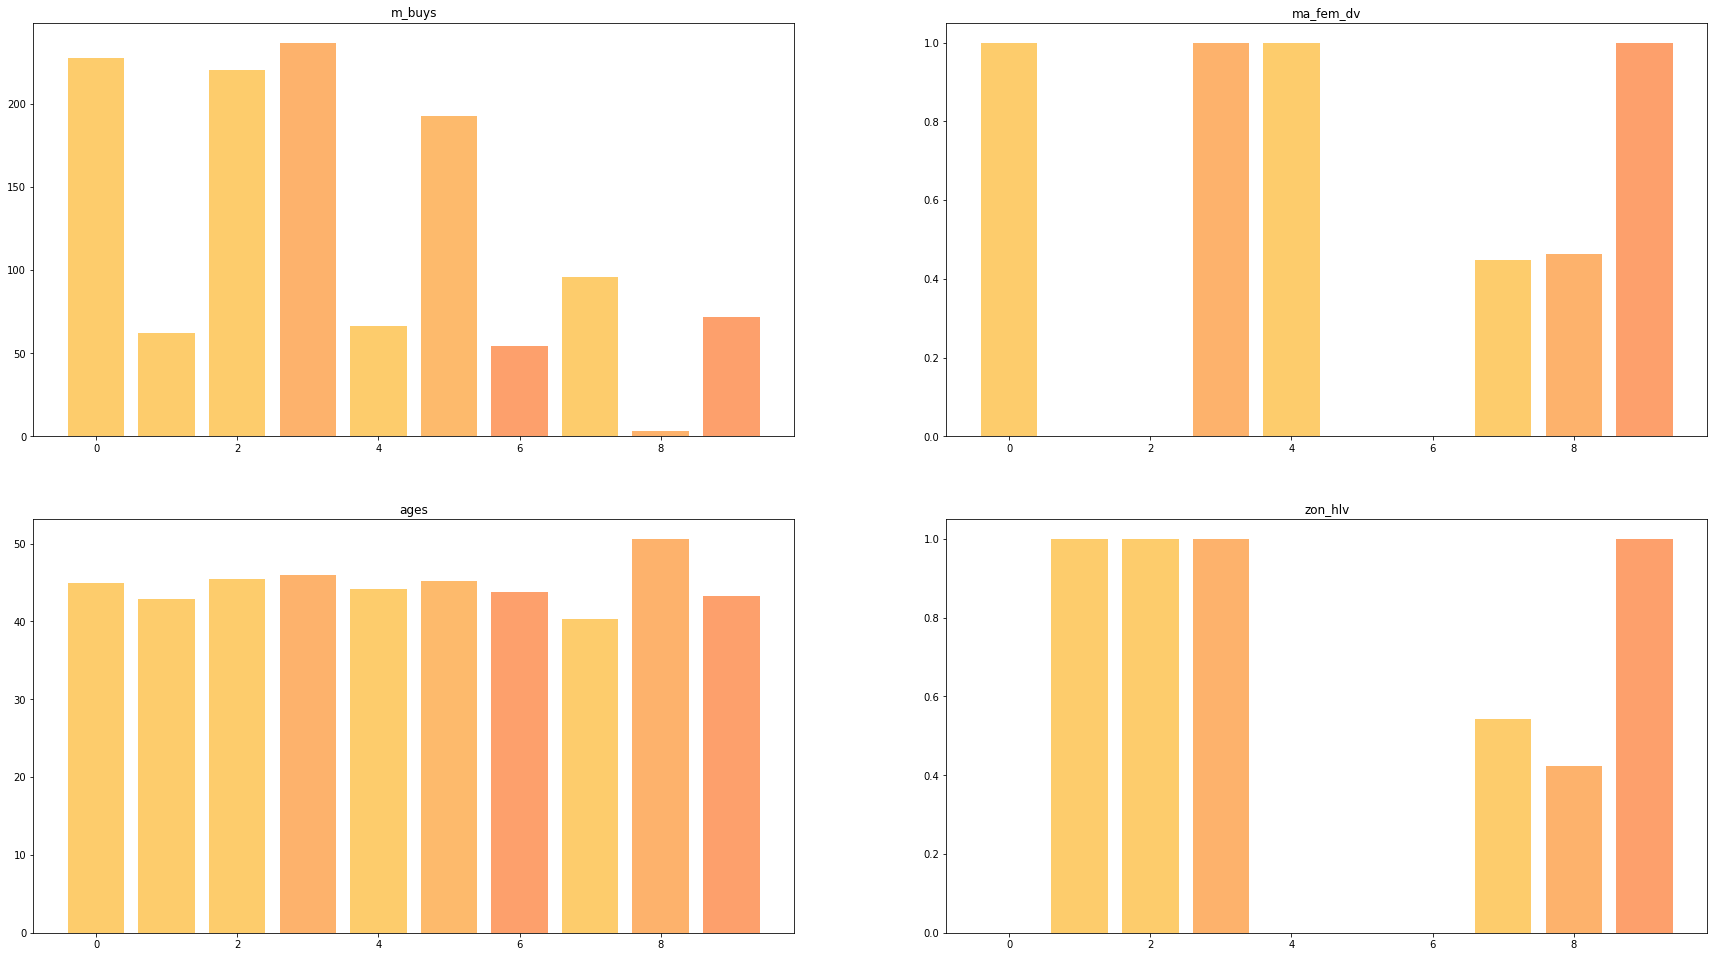

In [243]:
draw_bar(0,4)

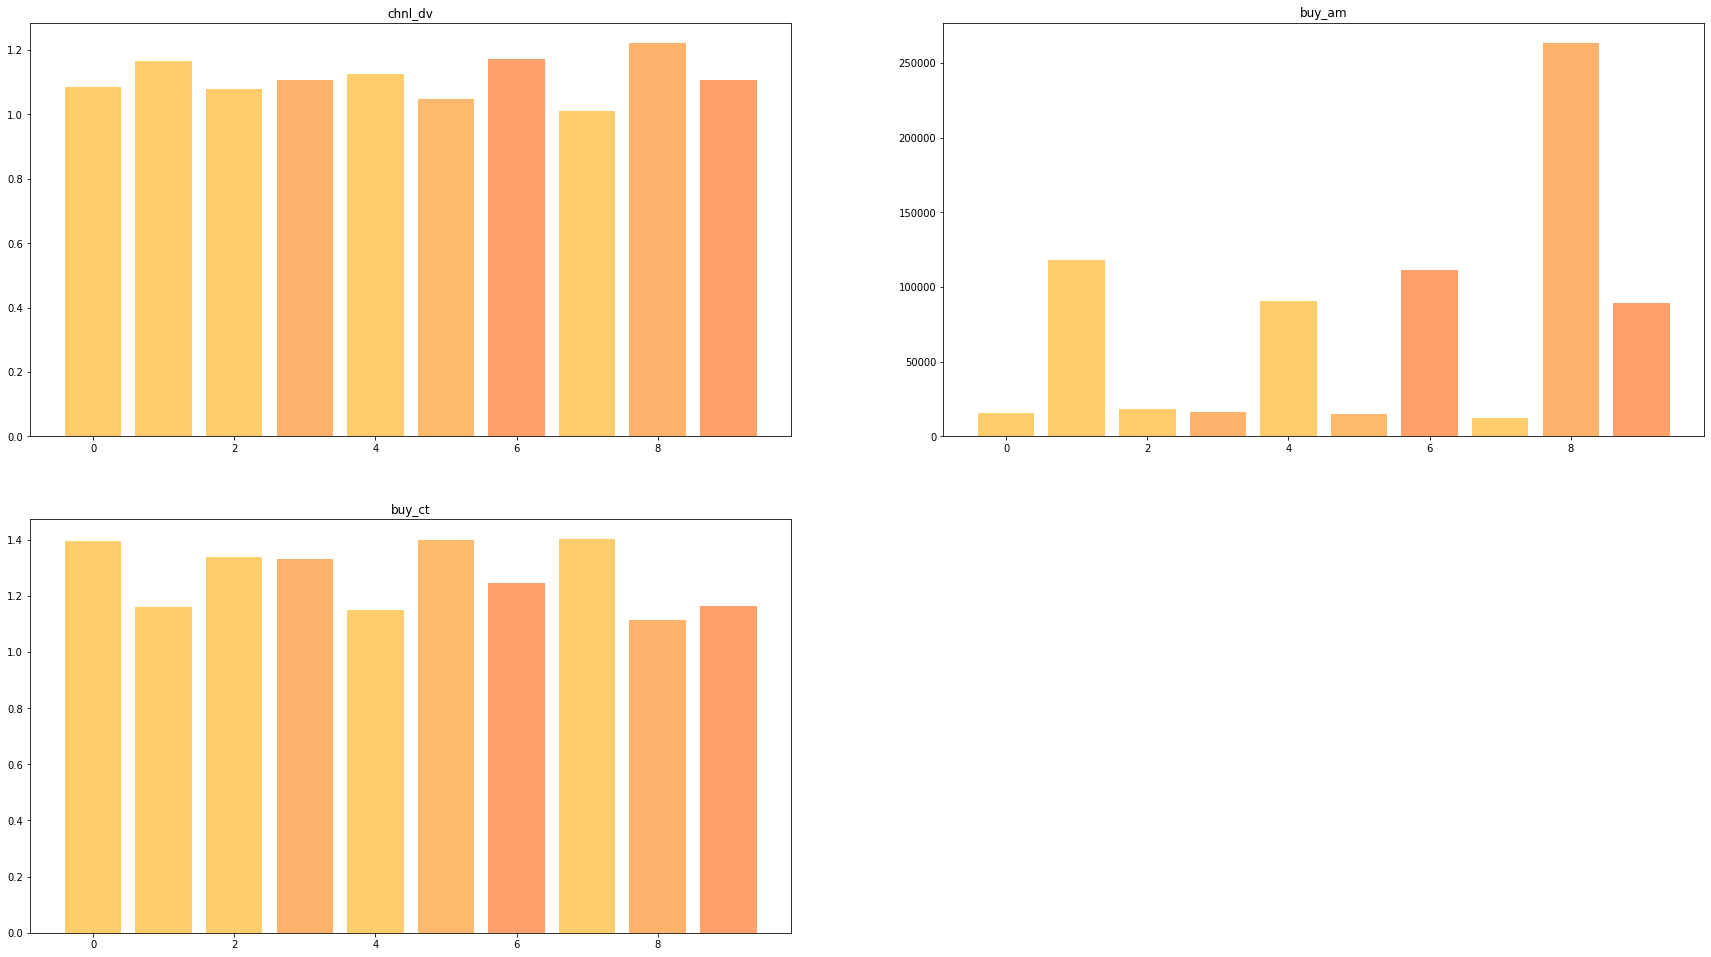

In [244]:
draw_bar(4,7)

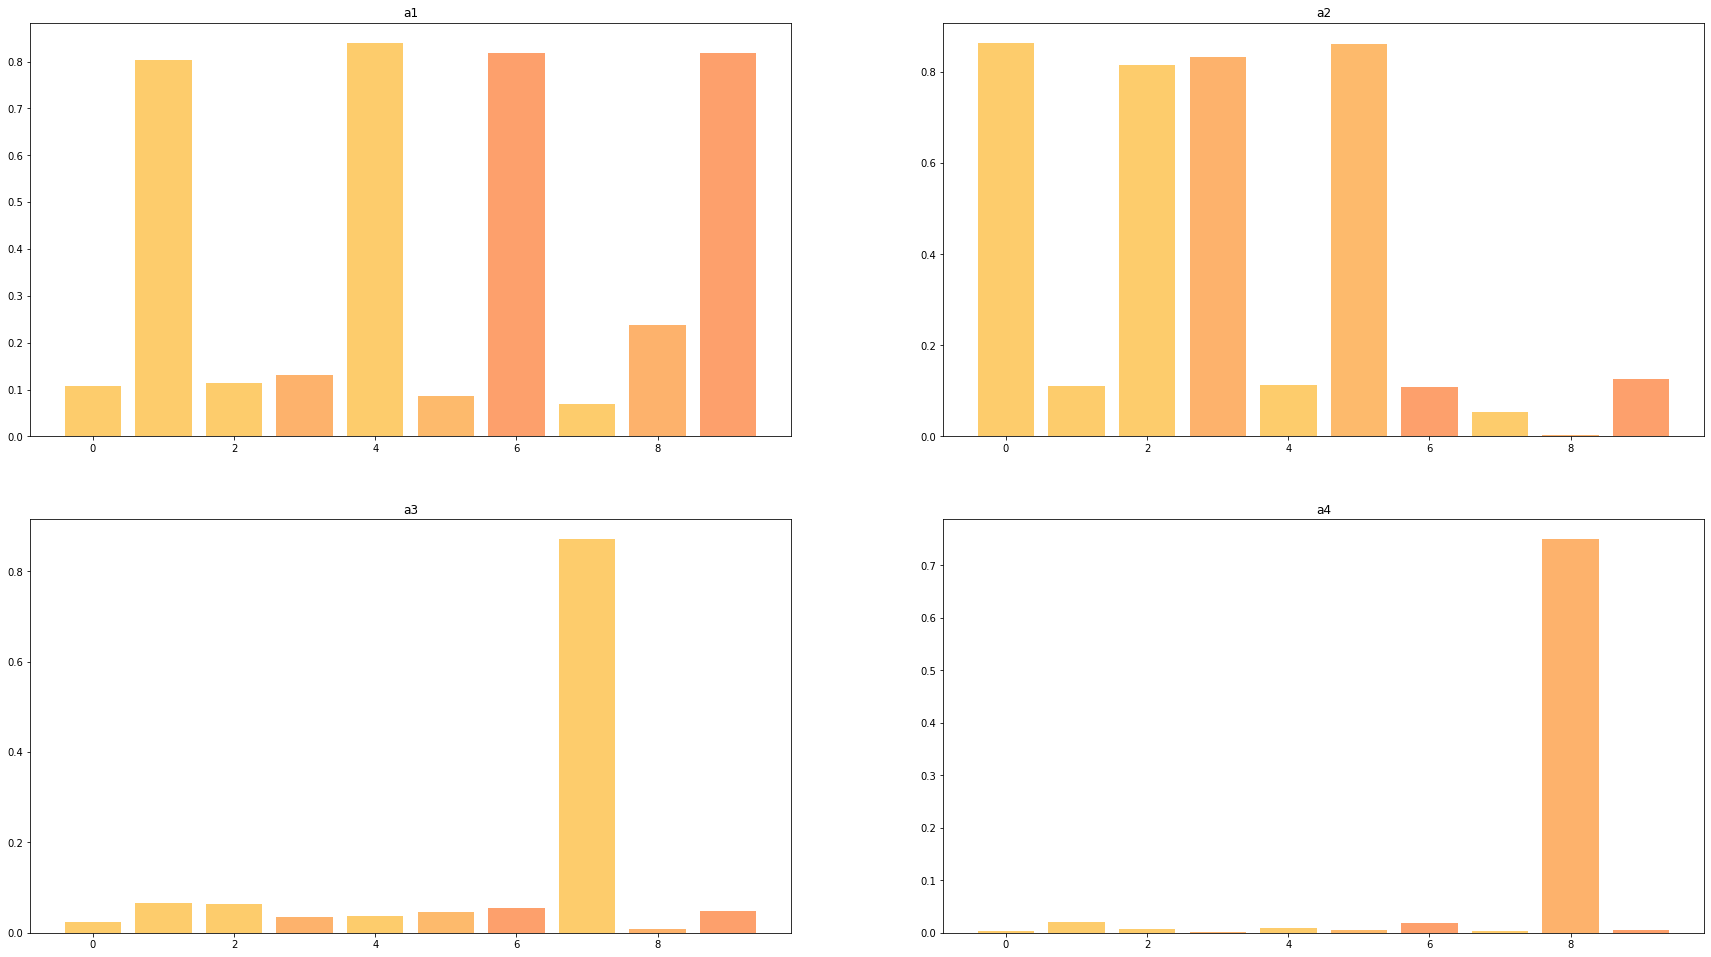

In [245]:
draw_bar(7,11)

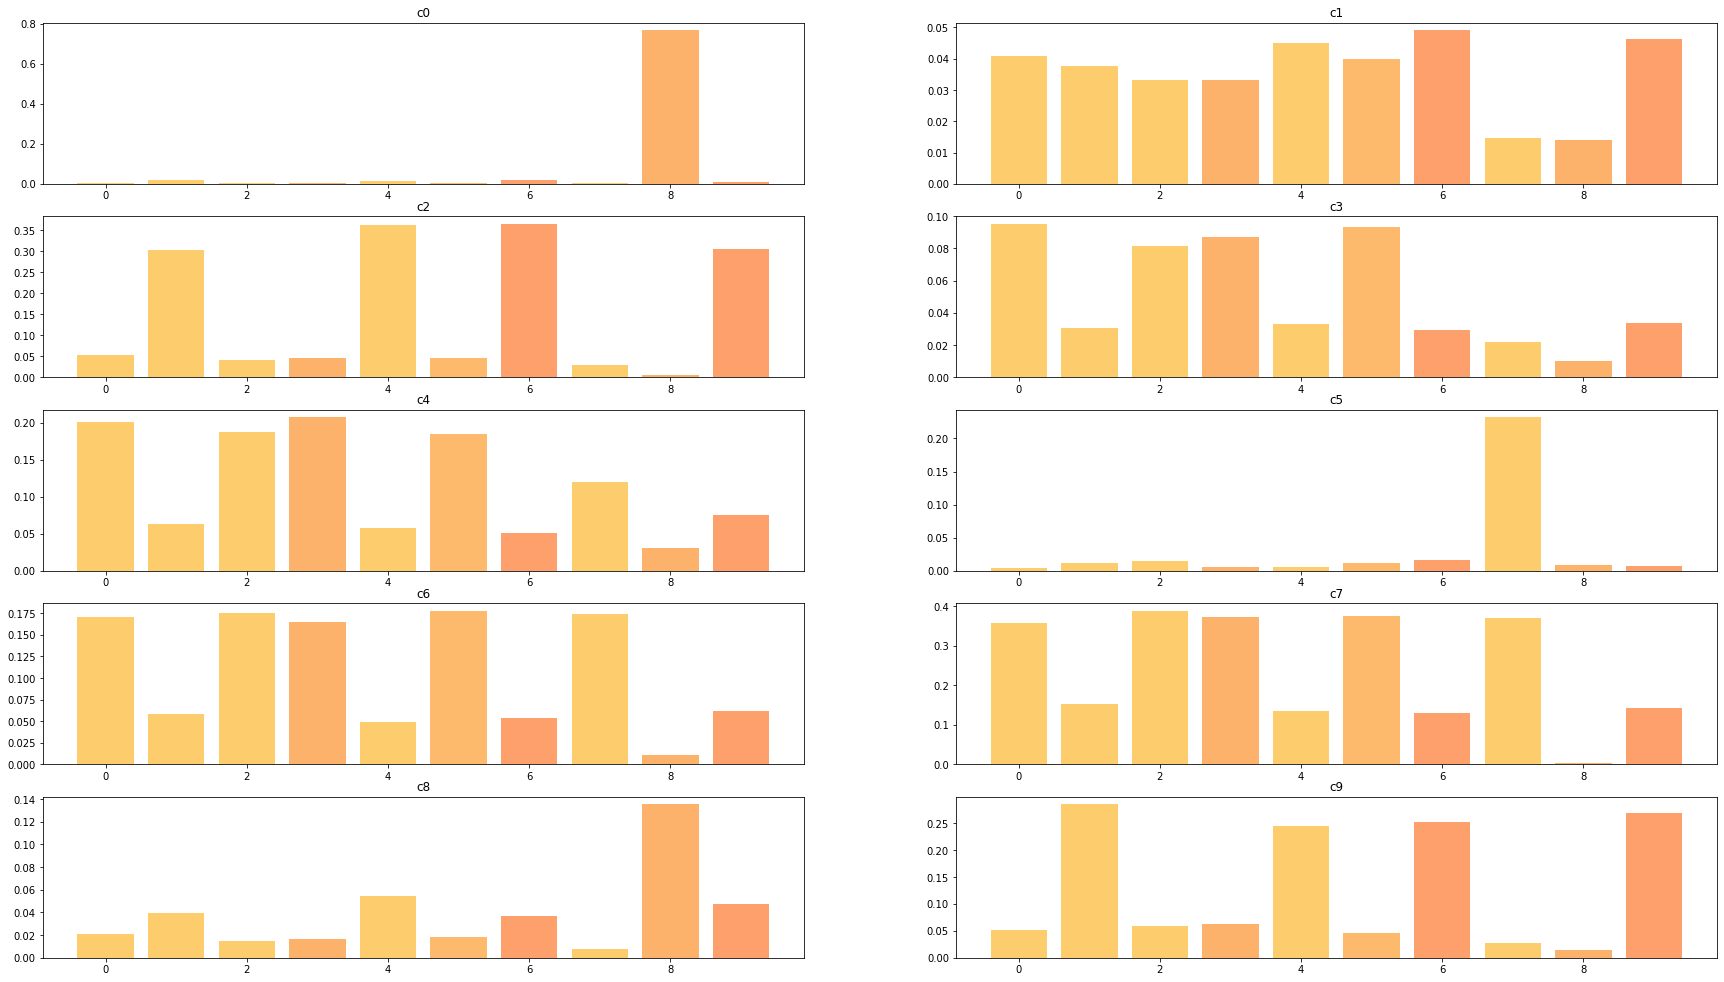

In [246]:
draw_bar(11,21)

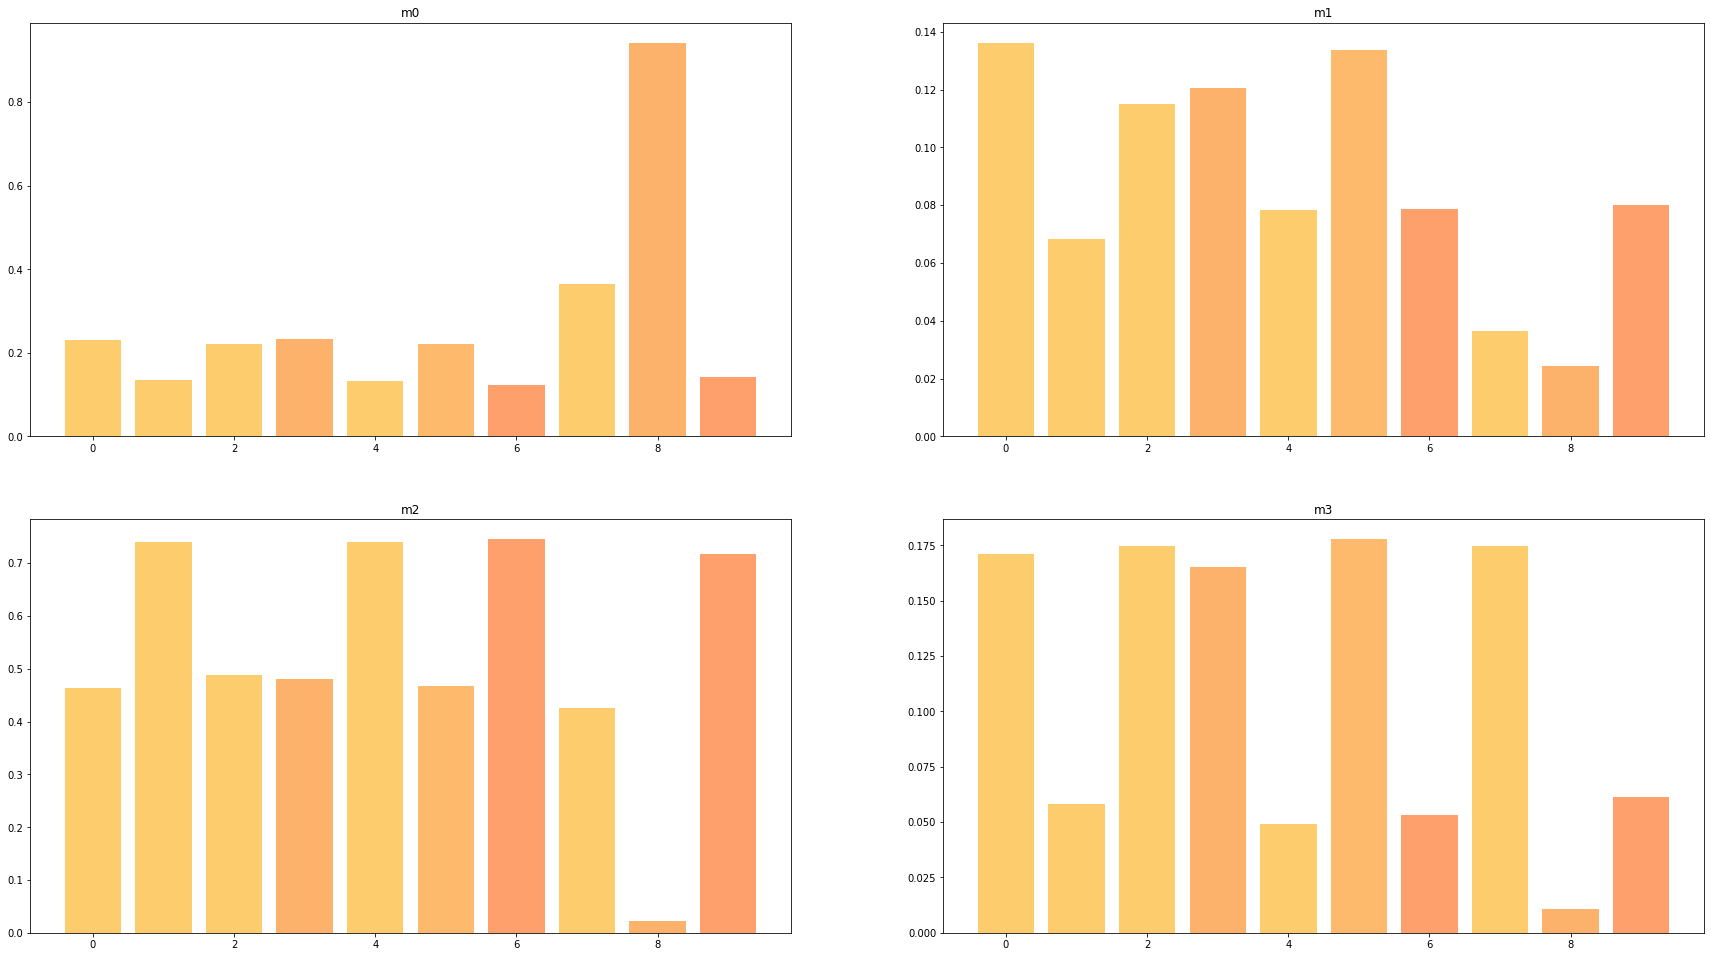

In [247]:
draw_bar(21,25)